In [1]:
import pandas as pd
import datetime as dt
weatherHistory=pd.read_csv('weatherHistory.csv')

In [2]:
for i in range(weatherHistory.shape[0]):
    weatherHistory['Formatted Date'][i]=dt.datetime.strptime(weatherHistory['Formatted Date'][i],'%Y-%m-%d %H:%M:%S.%f %z')

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [3]:
month_list=[]
year_list=[]
for i in weatherHistory['Formatted Date']:
    month_list.append(i.month)
    year_list.append(i.year)
    
weatherHistory['Month']=month_list
weatherHistory['Year']=year_list


In [4]:
s = pd.Series(weatherHistory.shape[0])
b=list(range(s[0]))
weatherHistory=weatherHistory.sort_values('Formatted Date').reset_index().drop('index',axis=1)

In [5]:
weatherHistory

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Month,Year
0,2006-01-01 00:00:00+01:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.,1,2006
1,2006-01-01 01:00:00+01:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.,1,2006
2,2006-01-01 02:00:00+01:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.,1,2006
3,2006-01-01 03:00:00+01:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.,1,2006
4,2006-01-01 04:00:00+01:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.,1,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-12-31 19:00:00+01:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,0.0,1020.03,Mostly cloudy throughout the day.,12,2016
96449,2016-12-31 20:00:00+01:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,0.0,1020.27,Mostly cloudy throughout the day.,12,2016
96450,2016-12-31 21:00:00+01:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,0.0,1020.50,Mostly cloudy throughout the day.,12,2016
96451,2016-12-31 22:00:00+01:00,Mostly Cloudy,snow,-0.472222,-3.644444,0.91,9.2414,182.0,8.4042,0.0,1020.65,Mostly cloudy throughout the day.,12,2016


In [6]:
import numpy as np
data_mean_temp_each_month=[]
data_mean_humid_each_month=[]

for i in range(1,13):
    temp_list_each_year=[]
    humid_list_each_year=[]
    for k in range(2006,2017):
        mean_temp=weatherHistory[(weatherHistory['Month']==i)&(weatherHistory['Year']==k)]['Apparent Temperature (C)'].mean()
        mean_humidity=weatherHistory[(weatherHistory['Month']==i)&(weatherHistory['Year']==k)]['Humidity'].mean()
        temp_list_each_year.append(mean_temp)
        humid_list_each_year.append(mean_humidity)
    data_mean_temp_each_month.append(temp_list_each_year)
    data_mean_humid_each_month.append(humid_list_each_year)
    
data_mean_humid_each_month=np.asarray(data_mean_humid_each_month)
data_mean_temp_each_month=np.asarray(data_mean_temp_each_month)

In [7]:
def simple_graph(graph):
    graph.spines['right'].set_visible(False)
    graph.spines['left'].set_visible(False)
    graph.spines['top'].set_visible(False)
    graph.spines['bottom'].set_visible(False)
    graph.tick_params(bottom='off',top='off',left='off',right='off')

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


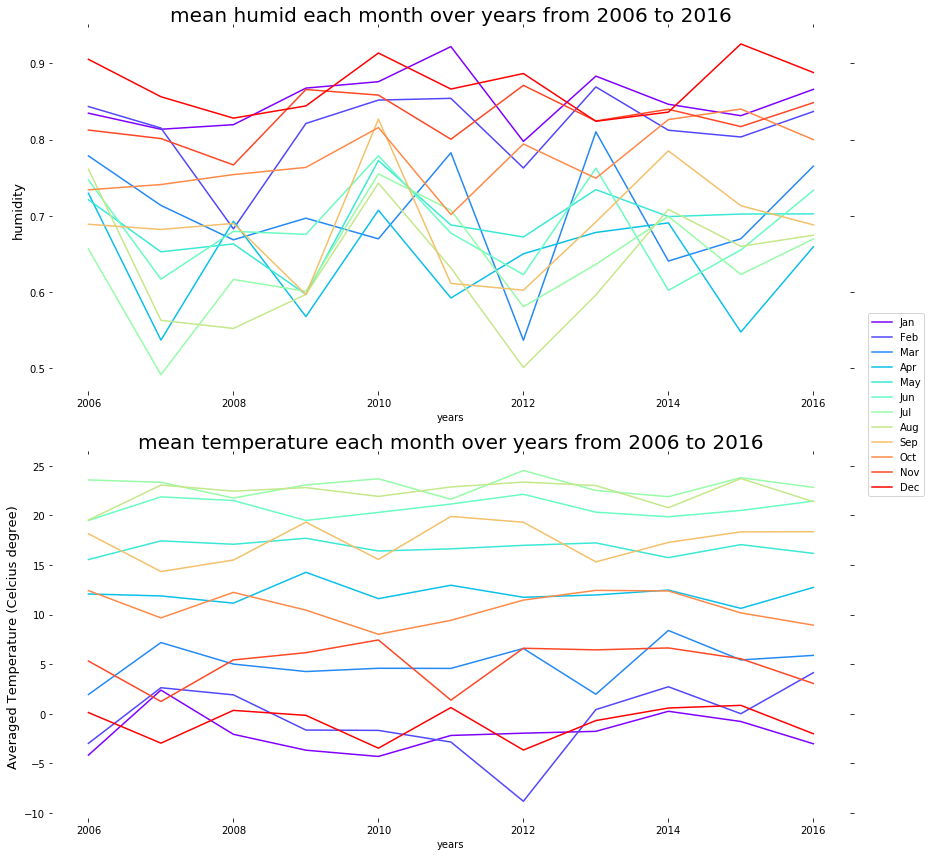

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig = plt.figure(figsize=(12, 12))
colorlist1 = iter(cm.rainbow(np.linspace(0, 1, 12)))
colorlist2 = iter(cm.rainbow(np.linspace(0, 1, 12)))

for sp in range(0,12):
    a=dt.datetime.strptime(str(sp+1),'%m')
    month_=dt.datetime.strftime(a,'%b')
    ax_1=fig.add_subplot(2,1,1)
    ax_1.plot(range(2006,2017),data_mean_humid_each_month[sp],c=next(colorlist1),label=month_)
    ax_2=fig.add_subplot(2,1,2)
    ax_2.plot(range(2006,2017),data_mean_temp_each_month[sp],c=next(colorlist2),label=month_)

ax_1.set_title('mean humid each month over years from 2006 to 2016',size=20)
ax_1.set_xlabel('years')
ax_1.set_ylabel('humidity',size=13)

ax_2.set_title('mean temperature each month over years from 2006 to 2016',size=20)
ax_2.set_xlabel('years')
ax_2.set_ylabel('Averaged Temperature (Celcius degree)',size=13)

simple_graph(ax_1)
simple_graph(ax_2)

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.1,1.4))

plt.show()


As you can see from the graphs, the averaged levels in humidity and temperature of each month remain almost the same during the surveyed period. There were noticeable fluctuations from 2006 to 2016, espeacially in humidity of the midst months of the years (May, Jun, July), however, when comparing the starting pointing and ending point, we witness no significant change in both humidity and temperature criteria.

Below are the code to analyze the peak and the bottom of temperature and humidity during the whole period

In [26]:
min_temp=data_mean_temp_each_month.min()
max_temp=data_mean_temp_each_month.max()

min_humid=data_mean_humid_each_month.min()
max_humid=data_mean_humid_each_month.max()

for m in range(data_mean_temp_each_month.shape[0]):
    month=data_mean_temp_each_month[m]
    for y in range(month.shape[0]):
        if month[y]==min_temp:
            a=dt.datetime.strptime(str(m+1),'%m')
            month_lowest_temp=dt.datetime.strftime(a,'%B')
            
            b=dt.datetime.strptime(str(y+2006),'%Y')
            year_lowest_temp=dt.datetime.strftime(b,'%Y')
            print('The lowest temperature was in '+month_lowest_temp+' of '+year_lowest_temp)
        if month[y]==max_temp:
            a=dt.datetime.strptime(str(m+1),'%m')
            month_highest_temp=dt.datetime.strftime(a,'%B')
            
            b=dt.datetime.strptime(str(y+2006),'%Y')
            year_highest_temp=dt.datetime.strftime(b,'%Y')
            print('The highest temperature was in '+month_highest_temp+' of '+year_highest_temp)
print()
for m in range(data_mean_humid_each_month.shape[0]):
    month=data_mean_humid_each_month[m]
    for y in range(month.shape[0]):
        if month[y]==min_humid:
            a=dt.datetime.strptime(str(m+1),'%m')
            month_lowest_humid=dt.datetime.strftime(a,'%B')
            
            b=dt.datetime.strptime(str(y+2006),'%Y')
            year_lowest_humid=dt.datetime.strftime(b,'%Y')
            print('The lowest humidity was in '+month_lowest_humid+' of '+year_lowest_humid)
        if month[y]==max_humid:
            a=dt.datetime.strptime(str(m+1),'%m')
            month_highest_humid=dt.datetime.strftime(a,'%B')
            
            b=dt.datetime.strptime(str(y+2006),'%Y')
            year_highest_humid=dt.datetime.strftime(b,'%Y')
            print('The highest humidity was in '+month_highest_humid+' of '+year_highest_humid)

The lowest temperature was in February of 2012
The highest temperature was in July of 2012

The lowest humidity was in July of 2007
The highest humidity was in December of 2015
